In [1]:
import pandas as pd
from numpy import random
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
import math
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('./titanic.csv')
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
df = df.dropna(subset=['Age'])
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
x.loc[:,('Sex')] = x.loc[:,('Sex')].replace({'male':0, 'female':1})
y = df['Survived']

In [3]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.474274861878453, 0.9736842105263158, 'Sex <= 0.5\nentropy = 0.975\nsamples = 535\nvalue = [317, 218]\nclass = dead'),
 Text(0.1691988950276243, 0.9210526315789473, 'Age <= 3.5\nentropy = 0.727\nsamples = 341\nvalue = [272, 69]\nclass = dead'),
 Text(0.022099447513812154, 0.868421052631579, 'Pclass <= 2.5\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]\nclass = survived'),
 Text(0.011049723756906077, 0.8157894736842105, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = survived'),
 Text(0.03314917127071823, 0.8157894736842105, 'Fare <= 24.85\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]\nclass = dead'),
 Text(0.022099447513812154, 0.7631578947368421, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = survived'),
 Text(0.04419889502762431, 0.7631578947368421, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = dead'),
 Text(0.31629834254143646, 0.868421052631579, 'Pclass <= 1.5\nentropy = 0.674\nsamples = 327\nvalue = [269, 58]\nclass = dead'),
 Text(0.1574585635359116, 0.8157

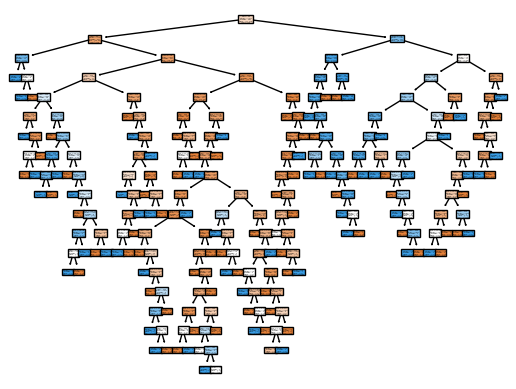

In [6]:
fn = ['Pclass', 'Sex', 'Age', 'Fare']
cn = ['dead', 'survived']
tree.plot_tree(clf, filled=True, class_names=cn, feature_names=fn)

In [8]:
y_pred = clf.predict(x_test)

In [9]:
y_pred == y_test

149    False
407     True
53      True
369     True
818     True
       ...  
445     True
323    False
714     True
876     True
265     True
Name: Survived, Length: 179, dtype: bool